<a href="https://colab.research.google.com/github/IlliaKindratenko/Machine-learning/blob/main/%D0%9B_%D0%A0_2_2_%D0%9A%D1%96%D0%BD%D0%B4%D1%80%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Завдання 2
Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.
1. Вивести перших 5 рядків.
2. Визначити розмір датасета.
3. Визначити тип даних.
4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення.
5. Ще раз перевірити наявність пропущених значень.
6. Перевірити наявність дублікатів. При наявності видалити дублікати.
7. Вивести описову статистику датасету describe()
8. Видалити стовпчик Cabin
9. Сформувати датасет з обраними стовпцями:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
значення даного стовпчика).
11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх
немає).
12.Вивести 5 перших рядків датасету.
13.Вивести 5 останніх рядків датасету.
14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?
15.Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?
16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?
17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?
18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?
19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?
3
20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
не вижив. Чи є видимі відмінності у вікових групах (дати
відповідь)?
21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?
22.Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/titanic files/titanic.csv'

df = pd.read_csv(file_path)

#Виведення перших 5 рядків
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Визначення розміру датасету
dataset_size = df.shape

print(f"Розмір датасета: {dataset_size[0]} рядків і {dataset_size[1]} стовпців.")

Розмір датасета: 418 рядків і 12 стовпців.


In [5]:
# Визначення типу даних
data_types = df.dtypes
data_types

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
# Перевірка наявності пропущених значень у датасеті
missing_values = df.isnull().sum()
print("Пропущені значення в кожному стовпці:")
print(missing_values)

Пропущені значення в кожному стовпці:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Заповнення пропущених значень на середнє значення для числових стовпців
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

<ipython-input-7-6b8b4e73b18c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-7-6b8b4e73b18c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [8]:
# Перевірка знову на наявність пропущених значень після заповнення
missing_values_after = df.isnull().sum()
print("\nПропущені значення після заповнення:")
print(missing_values_after)


Пропущені значення після заповнення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [9]:
# Перевірка наявності дублікатів у датасеті
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

Кількість дублікатів: 0


In [10]:
# Виведення описової статистики для числових стовпців датасету
descriptive_stats = df.describe()
print(descriptive_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [11]:
# Видалення стовпчика 'Cabin' з датасету
df.drop(columns=['Cabin'], inplace=True)

# Перевірка, що стовпчик був успішно видалений
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  


In [12]:
# Формування нового датасету з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_columns]

# Виведення перших кількох рядків нового датасету
print(df_selected.head())


   Survived  Pclass     Sex   Age     Fare
0         0       3    male  34.5   7.8292
1         1       3  female  47.0   7.0000
2         0       2    male  62.0   9.6875
3         0       3    male  27.0   8.6625
4         1       3  female  22.0  12.2875


In [13]:
selected_columns = df[['Sex']].copy()
print("Унікальні значення 'Sex':")
selected_columns['Sex'].unique()

# Заміна значень 'male' на 1 та 'female' на 0
selected_columns.loc[:, 'Sex'] = selected_columns['Sex'].map({'male': 1, 'female': 0})
selected_columns.head()

Унікальні значення 'Sex':


,Sex
0,1
1,0
2,1
3,1
4,0


In [14]:
# Перевірка наявності пропущених значень у датасеті
missing_values = df.isnull().sum()
print("Пропущені значення в кожному стовпці:")
print(missing_values)

Пропущені значення в кожному стовпці:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [15]:
# Виведення перших 5 рядків
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
#Виведення останніх 5 рядків
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,30.27259,1,1,2668,22.3583,C


In [17]:
# Аналіз виживання залежно від статі: Обчислення відсотка виживання для кожної статі
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
survival_by_sex

,Survived
Sex,
female,100.0
male,0.0


In [18]:
# Обчислення відсотка виживання для кожного класу (Pclass)
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

# Клас з найвищим рівнем виживання
highest_survival_class = survival_by_class.idxmax()

survival_by_class, highest_survival_class

(Pclass
 1    46.728972
 2    32.258065
 3    33.027523
 Name: Survived, dtype: float64,
 1)

In [20]:
# Визначення середнього віку тих, хто вижив, і тих, хто не вижив
avg_age_survived = df[df['Survived'] == 1]['Age'].mean()
avg_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Середній вік вижилих: {avg_age_survived:.2f}")
print(f"Середній вік невижилих: {avg_age_not_survived:.2f}")

Середній вік вижилих: 30.27
Середній вік невижилих: 30.27


In [21]:
# Розподіл пасажирів на групи за рівнями тарифів (Fare) і обчислення рівня виживання для кожної групи
fare_bins = pd.qcut(df['Fare'], 4)  # Поділ на 4 групи за рівнями тарифів
survival_by_fare_group = df.groupby(fare_bins)['Survived'].mean() * 100

survival_by_fare_group


<ipython-input-21-656d872fa91f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = df.groupby(fare_bins)['Survived'].mean() * 100


,Survived
Fare,
"(-0.001, 7.896]",26.315789
"(7.896, 14.454]",27.083333
"(14.454, 31.5]",39.047619
"(31.5, 512.329]",53.398058


In [22]:
# Визначення середнього тарифу (Fare) для кожного класу (Pclass)
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()

average_fare_by_class


,Fare
Pclass,
1,94.280297
2,22.202104
3,12.565951


In [23]:
# Обчислення середнього віку пасажирів для кожного класу (Pclass)
average_age_by_class = df.groupby('Pclass')['Age'].mean()

average_age_by_class


,Age
Pclass,
1,40.022928
2,28.857881
3,26.090397


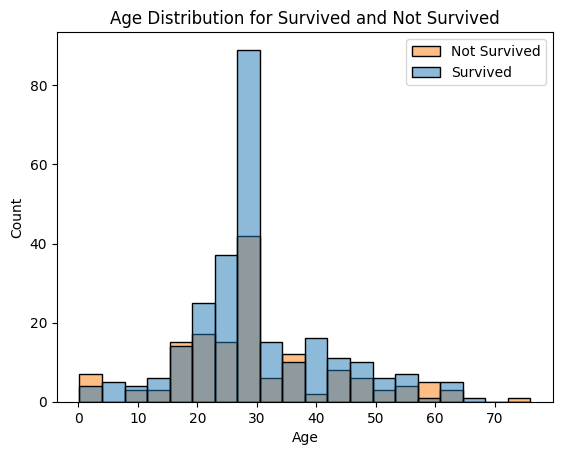

In [24]:
# Побудова гістограми розподілу віку для тих, хто вижив, і тих, хто не вижив
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=False)

plt.title('Age Distribution for Survived and Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])

plt.show()

In [25]:
# Обчисліть відсоток виживання для кожної комбінації статі та класу
survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

print("Відсоток виживання:")
print(survival_rate)
max_survival_group = survival_rate.idxmax()
max_survival_rate = survival_rate.max()

print(f"\nКомбінація з найвищим рівнем виживання: {max_survival_group} з відсотком {max_survival_rate:.2f}")


Відсоток виживання:
Sex     Pclass
female  1         1.0
        2         1.0
        3         1.0
male    1         0.0
        2         0.0
        3         0.0
Name: Survived, dtype: float64

Комбінація з найвищим рівнем виживання: ('female', 1) з відсотком 1.00


In [26]:
# Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
correlation = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print("Кореляція між змінними:")
print(correlation)
print("\nКореляція з виживанням:")
print(correlation['Survived'])


Кореляція між змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000

Кореляція з виживанням:
Survived    1.000000
Pclass     -0.108615
Age        -0.000011
Fare        0.191382
Name: Survived, dtype: float64


<ipython-input-26-6aa5380caf2c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-26-6aa5380caf2c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Висновок: Під час аналізу даних із датасету "Титанік" ми виконали кілька ключових кроків. Спочатку було очищено дані від пропущених значень та дублікатів, а також видалено стовпчик Cabin, який містив занадто багато пропусків. Аналіз показав, що жінки та пасажири 1-го класу мали значно вищий рівень виживання. Вік, клас та тариф впливали на шанси вижити, при цьому старші пасажири з вищими тарифами мали кращі шанси. Кореляційний аналіз виявив, що найбільш сильна позитивна кореляція із виживанням була у показника Fare, а негативна кореляція спостерігалася в Pclass і Age.